In [85]:
import glob
import pandas as pd
import re
import numpy as np
import scipy

instances = glob.glob('./instances/*.txt')

In [164]:
from sklearn.cluster import KMeans

In [165]:
kmc = KMeans(10, n_jobs=-1)
kmc.fit(df.loc[:, ['xcoord', 'ycoord']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
def read_data(filepath):
    with open(filepath, 'r') as f:
        name = f.readline()
        f.readline()
        f.readline()
        f.readline()
        vehicle_number, vehicle_capacity = re.sub('\s\s+', ';', f.readline().strip()).split(';')
        f.readline()
        f.readline()
        columns_names = re.sub('\s\s+', ';', f.readline().strip()).lower().split(';')
        columns_names = [re.sub(' ', '_', name.strip('.')) for name in columns_names]
        f.readline()
        lines = f.readlines()
        lines = [re.sub('\s\s+', ';', line.strip()).split(';') for line in lines]
        return name, vehicle_number, vehicle_capacity, columns_names, lines

In [162]:
name, vehicle_number, vehicle_capacity, columns_names, lines = read_data(instances[0])
df = pd.DataFrame(data=lines, columns=columns_names, dtype=int).set_index('cust_no')
df.sort_values('ready_time')

,xcoord,ycoord,demand,ready_time,due_date,service_time
cust_no,,,,,,
0,40,50,0,0,1236,0
20,30,50,10,10,265,90
67,47,40,10,12,275,90
65,48,40,10,12,223,90
5,42,65,10,15,226,90
24,25,50,10,15,333,90
3,42,66,10,16,336,90
43,33,35,10,16,273,90
42,33,32,20,19,345,90


In [137]:
distances = {(i,j): road_from_to(df, i, j) for i in range(100) for j in range(i)}
def dist(x, y):
    if x == y:
        return 0.0
    if x < y:
        return distances[(y, x)]
    else:
        return distances[(x, y)]

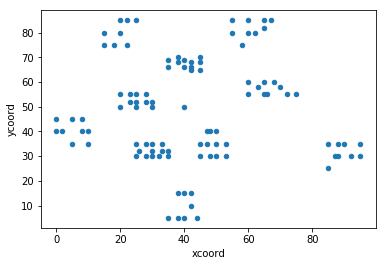

In [79]:
df.plot.scatter(1, 2)

In [161]:
def check_solution(s):
    pass

In [ ]:
def iterated_local_search():
    pass
def guided_local_search():
    pass

In [159]:
route = np.arange(1, 5)
print(slv._cost_function(route))
[slv.dist(client, route[i+1]) for i, client in enumerate(route[:-1])]

9.0


[2.0, 5.0, 2.0]

In [155]:
slv = VRPSolver(instances[0])


In [153]:
import re
import pandas as pd
import numpy as np

class VRPSolver:
    def __init__(self, instance):
        self.name, self.vehicle_number, self.vehicle_capacity, columns_names, lines = self.read_data(instance)
        self.df = pd.DataFrame(data=lines, columns=columns_names, dtype=int).set_index('cust_no')
        self.distances = {(i,j): self._dist_from_to(i, j) for i in range(100) for j in range(i)}
        self.solution = list()
    
    def read_data(self, filepath):
        with open(filepath, 'r') as f:
            name = f.readline()
            f.readline()
            f.readline()
            f.readline()
            vehicle_number, vehicle_capacity = re.sub('\s\s+', ';', f.readline().strip()).split(';')
            f.readline()
            f.readline()
            columns_names = re.sub('\s\s+', ';', f.readline().strip()).lower().split(';')
            columns_names = [re.sub(' ', '_', name.strip('.')) for name in columns_names]
            f.readline()
            lines = f.readlines()
            lines = [re.sub('\s\s+', ';', line.strip()).split(';') for line in lines]
            return name, vehicle_number, vehicle_capacity, columns_names, lines
    
    def _dist_from_to(self, client_i, client_j):
        return np.linalg.norm(
            self.df.loc[client_i, ['xcoord', 'ycoord']].values 
            - self.df.loc[client_j, ['xcoord', 'ycoord']].values
        )
    
    def dist(self, client_i, client_j):
        if client_i == client_j:
            return 0.0
        if client_i < client_j:
            return self.distances[(client_j, client_i)]
        else:
            return self.distances[(client_i, client_j)]
    
    def _cost_function(self, route):
        return np.sum(self.dist(client, route[i+1]) for i, client in enumerate(route[:-1]))
        
    def _check_vehicle_load(v, cap):
        return v <= cap

    def _check_route(r):
        assert len(r) % 2 == 0, "Route len is not even"
        if r[0] != 0:
            print('Route doesn\'t start at depot')
        if r[-2] != 0:
            print('Route doesn\'t end in depot')
        return r[0] == 0 and r[-2] == 0

    def get_initial_solution(self):
        route = list()
        start_serving = list()
        route.append(0)
        start_serving.append(0.0)
        
        